<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Operaciones_Anual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [8]:
# Loading the CSV file as dataframe
Operación_df = pd.read_csv("./data/Dataset_Operacion_Anual.csv")

In [9]:
# Showing dataframe dimensions
Operación_df.shape

(30100, 5)

In [10]:
# Showing column types
Operación_df.dtypes

DESCRIPCIÓN DEL ARTICULO    object
CANTIDAD                     int64
MES                         object
TIPO                        object
AÑO                          int64
dtype: object

In [11]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
Operación_df.sample(10) # Showing a sample of n rows

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
2457,GLUCONATO DE CALCIO,0,DICIEMBRE,VENTAS,2023
6747,FOSFORILCOLAMINA,734,DICIEMBRE,INVENTARIO,2023
8905,GLICEROFOSFATO DE SODIO,0,OCTUBRE,VENTAS,2022
24895,SECNIDAZOL,200,DICIEMBRE,VENTAS,2020
25094,PENICILINA POTASICA ESTERIL,0,ENERO,COMPRAS,2020
11762,PANTOTENATO DE CALCIO,0,NOVIEMBRE,COMPRAS,2022
6033,AMPROLIO HCL,350,SEPTIEMBRE,INVENTARIO,2023
19145,AMPICILINA SODICA POLVO ESTERIL,50,OCTUBRE,COMPRAS,2021
5486,L-FENILALANINA,-2,JUNIO,INVENTARIO,2023
20465,CLORPIRIFOS TECNICO,-750,ABRIL,INVENTARIO,2021


## 1. Verificar Caliad de los datos

In [12]:
!pip install pylev

In [13]:
import re
from random import randint
from datetime import datetime
from difflib import SequenceMatcher

import numpy as np
import pandas as pd

import pylev

In [14]:
month_list = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

In [15]:
# Finding values not matching with the dictionary
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

In [16]:
Operación_df["MES"].nunique()

12

In [17]:
Operación_df["MES"].unique()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype=object)

In [18]:
Operación_df["MES"] = Operación_df["MES"].str.replace(r'^\s*$', '', regex=True)

In [19]:
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

## Detectando duplicados sobre las columnas

In [20]:
# Detecting duplicates by "CÉDULA" column
duplicates_by_product = Operación_df.loc[Operación_df["DESCRIPCIÓN DEL ARTICULO"].duplicated(keep=False)]

In [21]:
duplicates_by_product.shape

(30098, 5)

In [22]:
# Encuentra las filas duplicadas basadas en las columnas especificadas
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]

duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
25794,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25797,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25795,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25798,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25796,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
25799,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
26654,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26657,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26655,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020
26658,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020


In [23]:
Operación_df = Operación_df.drop_duplicates(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep='first')

In [24]:
# Lista de columnas que quieres considerar para buscar duplicados
columnas_a_verificar = ['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO']

# Encuentra las filas duplicadas basadas en las columnas especificadas
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]

duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO


# 2. Analisis univariado

## DESCRIPCIÓN DEL ARTICULO

In [25]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
Operación_df["DESCRIPCIÓN DEL ARTICULO"].nunique()

224

In [26]:
# Showing unique values of neighbourhoods
Operación_df["DESCRIPCIÓN DEL ARTICULO"].unique()

array(['ACETAMINOFEN (PARACETAMOL)', 'ACIDO ACETIL SALICILICO',
       'ACIDO FOLICO', 'ACIDO SALICILICO',
       'ADENOSIN TRIFOSFATO DISODICO (ATP)', 'ALBENDAZOL MICRONIZADO',
       'ALGINATO DE SODIO', 'AMITRAZ TECNICO',
       'AMOXICILINA TRIHIDRATO COMPACTADA',
       'AMOXICILINA TRIHIDRATO POLVO', 'AMPICILINA SODICA POLVO ESTERIL',
       'AMPICILINA TRIHIDRATO MICRONIZADA', 'AMPICILINA TRIHIDRATO POLVO',
       'AMPROLIO HCL', 'ANTIPIRINA', 'ATROPINA SULFATO', 'AZITROMICINA',
       'BENZOCAINA', 'BETAMETASONA BASE', 'BETAMETASONA SODIO FOSFATO',
       'BIOTINA 2%', 'BOLDENONA UNDECILENATO', 'BROMHEXINA HCL',
       'BUTOXIDO DE PIPERONILO', 'CACODILATO DE SODIO', 'CAFEINA ANHIDRA',
       'CEFAPIRINA BENZATINICA MICRONIZADA ESTERIL',
       'CEFOPERAZONA SODICA ESTERIL', 'CEFPODOXIMA PROXETIL',
       'CEFQUINOMA SULFATO', 'CEFTIOFUR HCL ESTERIL',
       'CEFTIOFUR LIBRE DE ACIDOS', 'CEFTIOFUR SODICO ESTERIL',
       'CIPERMETRINA TECNICA',
       'CIPERMETRINA TECNICA (EST

In [27]:
# Calculating the relative frecuency of room types
Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts(dropna=False, normalize=False) # You can set normalize to False for calculating the absolute frecuency

ACETAMINOFEN (PARACETAMOL)          140
METRONIDAZOL BENZOYL MICRONIZADO    140
MONOETANOLAMINA                     140
MONTELUKAST SODICO                  140
NEOMICINA SULFATO                   140
                                   ... 
SALDOS INICIAL 01-31-2026             3
SALDOS INICIAL 01-31-2024             3
GLICEROFOSFATO MANGANESO NF14         3
GLICEROFOSFATO MANGANESO NF10         1
SALDOS INICIAL 01-31-2020             1
Name: DESCRIPCIÓN DEL ARTICULO, Length: 224, dtype: int64

In [28]:
# Calculating basic statistics of accommodates
Operación_df["DESCRIPCIÓN DEL ARTICULO"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count                          29680
unique                           224
top       ACETAMINOFEN (PARACETAMOL)
freq                             140
Name: DESCRIPCIÓN DEL ARTICULO, dtype: object

<span style="color: red;">What does it means the value of 0 for this attribute?</span>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

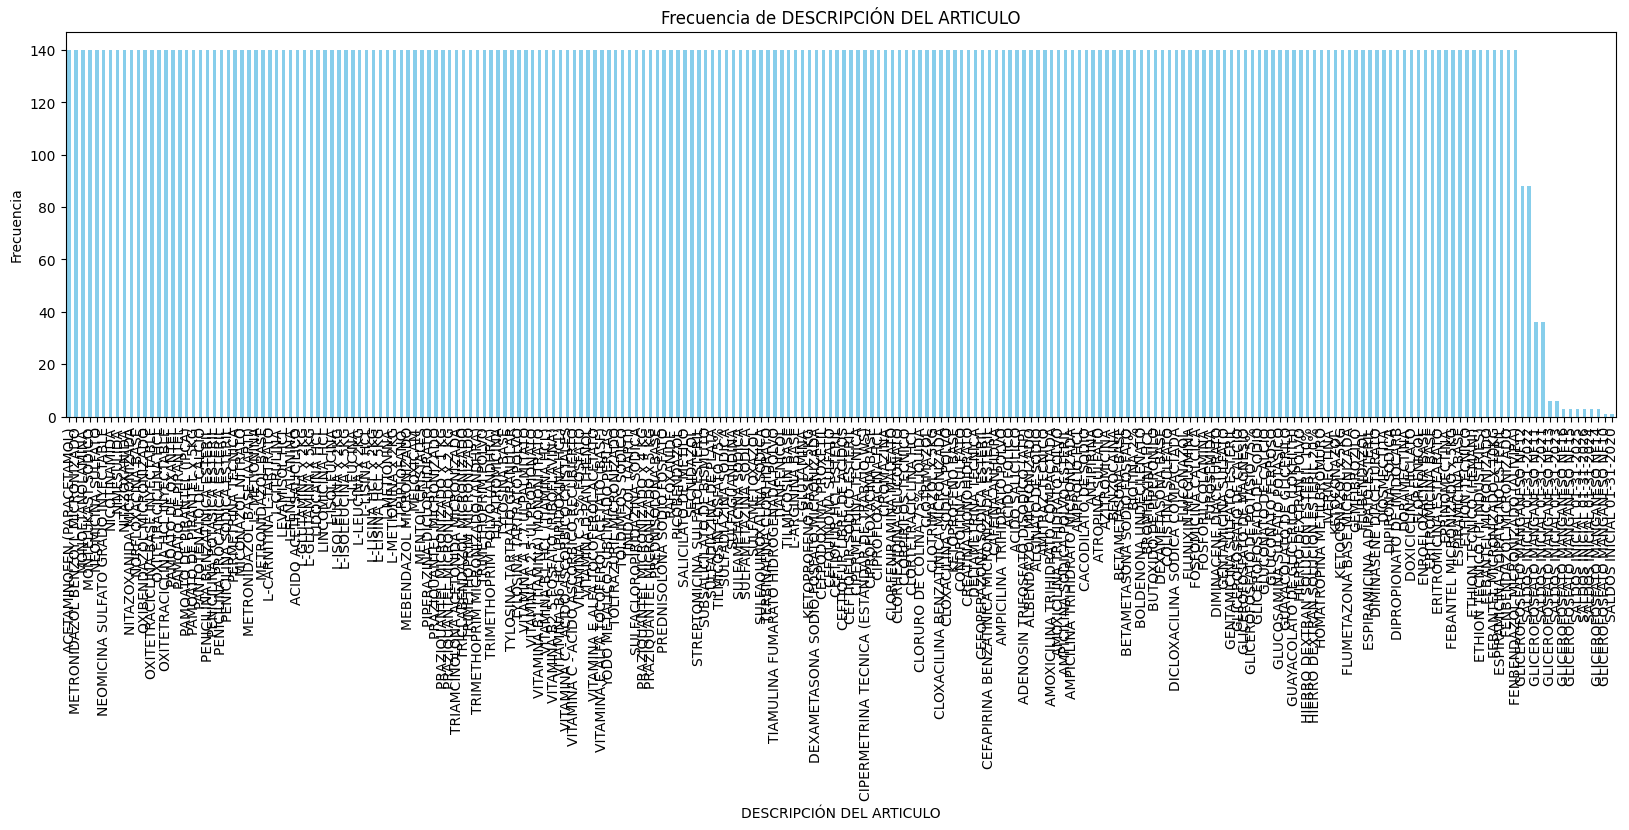

In [29]:
conteo_valores = Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts()
plt.figure(figsize=(20, 5))
conteo_valores.plot(kind='bar', color='skyblue')
plt.title("Frecuencia de DESCRIPCIÓN DEL ARTICULO")
plt.xlabel("DESCRIPCIÓN DEL ARTICULO")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles


<span style="color: red;">This attribute has a extreme outlier making difficult a proper visualization?</span>

In [30]:
Operación_df['DESCRIPCIÓN DEL ARTICULO'].mode()

0                    ACETAMINOFEN (PARACETAMOL)
1                       ACIDO ACETIL SALICILICO
2                                  ACIDO FOLICO
3                              ACIDO SALICILICO
4            ADENOSIN TRIFOSFATO DISODICO (ATP)
                         ...                   
205                      VITAMINA C 35% FOSFATO
206                        VITAMINA D-PANTHENOL
207           VITAMINA E ALFA TOCOFEROL ACETATO
208    VITAMINA E ALFA TOCOFEROL ACETATO (BASF)
209              YODO METALICO SUBLIMADO PERLAS
Name: DESCRIPCIÓN DEL ARTICULO, Length: 210, dtype: object

## CANTIDAD

In [32]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
Operación_df["CANTIDAD"].nunique()

2044

In [33]:
# Showing unique values of neighbourhoods
Operación_df["CANTIDAD"].unique()

array([  2525,    150,      0, ..., -10075,  -3717,  -1070])

In [34]:
# Calculating the relative frecuency of room types
Operación_df["CANTIDAD"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

 0        0.607817
 25       0.012129
-1        0.009906
 50       0.009535
 100      0.007345
            ...   
-54075    0.000034
-1790     0.000034
-3990     0.000034
-9575     0.000034
-1070     0.000034
Name: CANTIDAD, Length: 2044, dtype: float64

In [35]:
# Calculating basic statistics of accommodates
Operación_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    29680.000000
mean      -574.098349
std       3633.283020
min     -84750.000000
5%       -3000.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        425.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

In [36]:
# Let's make some calculations for determining an outlier threshold
q1 = Operación_df["CANTIDAD"].quantile(0.25)
q3 = Operación_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

<Figure size 2000x500 with 0 Axes>

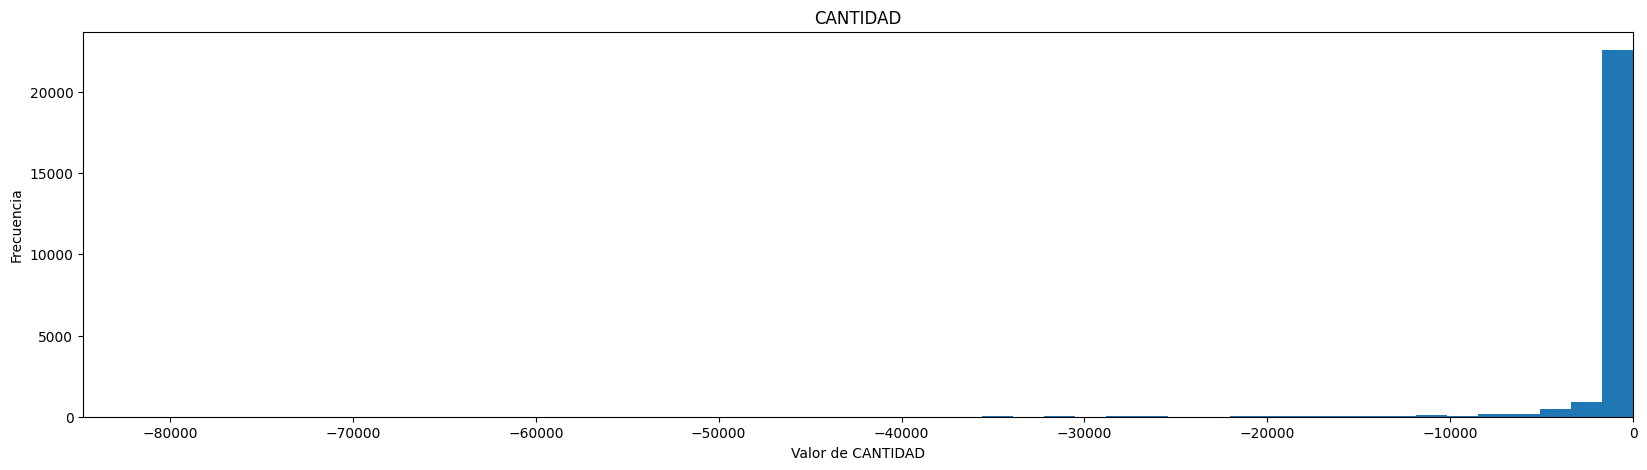

In [53]:
plt.figure(figsize=(20, 5))
data_filtered = Operación_df.loc[Operación_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

min_value = data_filtered.min()
max_value = data_filtered.max()

# Crea el histograma con los valores filtrados
plt.figure(figsize=(20, 5))
plt.hist(data_filtered, bins=50)

# Establece los límites del eje x para mostrar un rango específico
plt.xlim(min_value, max_value)

plt.title("CANTIDAD")
plt.xlabel("Valor de CANTIDAD")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

## 2. Bivariate analysis

In [ ]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

In [ ]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()